# Support Vector Machine
## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the datasets**

In [82]:
df = pd.read_csv('Dataset/testing/fsi-2014-to2020.csv')
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2020,1st,112.4,9.7,10.0,9.7,9.4,7.8,7.0,9.9,9.5,10.0,9.8,9.7,10.0,-1.1
1,Somalia,2020,2nd,110.9,9.8,10.0,8.6,9.1,9.4,8.9,8.9,9.1,9.0,10.0,9.1,9.0,-1.3
2,South Sudan,2020,3rd,110.8,9.4,9.7,9.1,9.5,9.2,6.8,9.9,9.5,9.0,9.5,9.7,9.5,-1.4
3,Syria,2020,4th,110.7,9.9,9.9,10.0,8.7,7.2,8.4,10.0,9.1,10.0,7.6,10.0,10.0,-0.9
4,Congo Democratic Republic,2020,5th,109.4,8.5,9.8,9.7,8.0,8.6,6.9,9.7,9.5,9.5,9.8,10.0,9.4,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Switzerland,2014,174th,23.3,1.7,1.0,3.5,2.2,2.4,2.4,0.9,1.7,1.7,2.4,1.8,1.6,NaN
1241,Norway,2014,175th,23.0,2.8,1.1,3.7,2.0,1.7,1.9,0.5,1.7,1.6,2.3,2.2,1.5,NaN
1242,Denmark,2014,176th,22.8,1.8,1.4,3.4,2.2,1.8,2.0,0.8,1.7,1.6,2.8,1.4,1.9,NaN
1243,Sweden,2014,177th,21.4,2.4,1.8,1.0,2.0,1.8,1.8,0.8,1.8,1.3,2.8,2.6,1.3,NaN


In [49]:
df.shape


(1387, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1387 non-null   object 
 1   Year                              1387 non-null   int64  
 2   Rank                              1387 non-null   object 
 3   Total                             1387 non-null   float64
 4   C1: Security Apparatus            1387 non-null   float64
 5   C2: Factionalized Elites          1387 non-null   float64
 6   C3: Group Grievance               1387 non-null   float64
 7   E1: Economy                       1387 non-null   float64
 8   E2: Economic Inequality           1387 non-null   float64
 9   E3: Human Flight and Brain Drain  1387 non-null   float64
 10  P1: State Legitimacy              1387 non-null   float64
 11  P2: Public Services               1387 non-null   float64
 12  P3: Hu

In [51]:
filtw =(df['Total'] >=60.0) & (df['Total'] <= 89.9) 
filts =(df['Total'] >=0.0) & (df['Total'] <= 29.9) 
filtst =(df['Total'] >=30) & (df['Total'] <= 59.9)
filta =(df['Total'] >=90)
filtn =(df['Total'] < 0)

In [52]:
df['cluster']= df['Total']

In [75]:
df.drop(columns=['Rank'],inplace=True)
df

,Country,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,cluster
0,Somalia,2013,113.9,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,9.5,10.0,9.4,1.0
1,Congo Democratic Republic,2013,111.9,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,10.0,10.0,9.7,1.0
2,Sudan,2013,111.0,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,8.8,10.0,10.0,1.0
3,South Sudan,2013,110.6,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,8.9,10.0,10.0,1.0
4,Chad,2013,109.0,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,9.5,9.7,7.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Switzerland,2006,18.7,1.0,1.0,2.0,1.2,2.5,2.0,1.0,1.0,1.5,3.0,1.5,1.0,0.0
1383,Ireland,2006,18.6,1.0,1.0,1.0,1.9,3.0,2.0,1.5,1.3,1.5,2.0,1.4,1.0,0.0
1384,Finland,2006,18.2,1.0,1.0,1.0,2.2,2.0,2.0,1.0,1.0,1.5,3.0,1.5,1.0,0.0
1385,Sweden,2006,18.2,1.0,1.0,1.0,1.2,2.0,2.0,1.0,1.0,1.5,3.0,2.5,1.0,0.0


In [54]:
df.loc[filta,'cluster']=1
df.loc[filtw,'cluster']=1
df.loc[filts,'cluster']=0
df.loc[filtst,'cluster']=0
df.loc[filtn,'cluster']=1
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,cluster
0,Somalia,2013,1st,113.9,9.7,10.0,9.3,9.4,8.4,8.9,9.5,9.8,10.0,9.5,10.0,9.4,1.0
1,Congo Democratic Republic,2013,2nd,111.9,10.0,9.5,9.4,8.5,8.8,7.1,9.6,9.5,9.8,10.0,10.0,9.7,1.0
2,Sudan,2013,3rd,111.0,9.8,10.0,10.0,7.8,8.5,8.4,9.6,8.8,9.3,8.8,10.0,10.0,1.0
3,South Sudan,2013,4th,110.6,9.6,9.8,10.0,8.6,8.9,6.5,9.1,9.8,9.3,8.9,10.0,10.0,1.0
4,Chad,2013,5th,109.0,9.4,9.5,8.8,8.0,8.9,8.0,9.7,9.9,9.8,9.5,9.7,7.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Switzerland,2006,142nd,18.7,1.0,1.0,2.0,1.2,2.5,2.0,1.0,1.0,1.5,3.0,1.5,1.0,0.0
1383,Ireland,2006,143rd,18.6,1.0,1.0,1.0,1.9,3.0,2.0,1.5,1.3,1.5,2.0,1.4,1.0,0.0
1384,Finland,2006,144th,18.2,1.0,1.0,1.0,2.2,2.0,2.0,1.0,1.0,1.5,3.0,1.5,1.0,0.0
1385,Sweden,2006,144th,18.2,1.0,1.0,1.0,1.2,2.0,2.0,1.0,1.0,1.5,3.0,2.5,1.0,0.0


In [55]:
# import matplotlib.pyplot as plt
 

# country = df['Country']
# total = df['Total']
  
# fig = plt.figure(figsize=(100,50))
 
# # creating the bar plot
# plt.bar(country, total, color ='orange',
#         width = 0.4)
 
# plt.xlabel("Country")
# plt.ylabel("Total")
# plt.title("Country v/s Total")
# plt.show()

In [56]:
X=df.loc[:, ['E1: Economy','Total']].values
X

array([[  9.4, 113.9],
       [  8.5, 111.9],
       [  7.8, 111. ],
       ...,
       [  2.2,  18.2],
       [  1.2,  18.2],
       [  1.8,  16.8]])

In [57]:
Y=df.loc[:, 'cluster'].values
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [58]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [59]:
Y_Train

array([0., 0., 1., ..., 0., 1., 0.])

In [60]:
Y_Test

array([0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

In [61]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [72]:
Y_Pred = classifier.predict(X_Test)


## Evaluation Results

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        94
         1.0       1.00      0.99      1.00       253

    accuracy                           0.99       347
   macro avg       0.99      1.00      0.99       347
weighted avg       0.99      0.99      0.99       347



## Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[ 94,   0],
       [  2, 251]])

In [65]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X_Set


array([[-0.44623082, -0.56666879],
       [-1.12008769, -1.54581777],
       [ 0.07212063,  0.58070403],
       ...,
       [-1.22375798, -1.36896707],
       [ 1.3161641 ,  1.05518151],
       [-0.70540654, -1.26975814]])

In [66]:
Y_Set

array([0., 0., 1., ..., 0., 1., 0.])

In [67]:
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

In [68]:
X1

array([[-3.46780145, -3.45780145, -3.44780145, ...,  3.17219855,
         3.18219855,  3.19219855],
       [-3.46780145, -3.45780145, -3.44780145, ...,  3.17219855,
         3.18219855,  3.19219855],
       [-3.46780145, -3.45780145, -3.44780145, ...,  3.17219855,
         3.18219855,  3.19219855],
       ...,
       [-3.46780145, -3.45780145, -3.44780145, ...,  3.17219855,
         3.18219855,  3.19219855],
       [-3.46780145, -3.45780145, -3.44780145, ...,  3.17219855,
         3.18219855,  3.19219855],
       [-3.46780145, -3.45780145, -3.44780145, ...,  3.17219855,
         3.18219855,  3.19219855]])

In [69]:
X2

array([[-3.33517576, -3.33517576, -3.33517576, ..., -3.33517576,
        -3.33517576, -3.33517576],
       [-3.32517576, -3.32517576, -3.32517576, ..., -3.32517576,
        -3.32517576, -3.32517576],
       [-3.31517576, -3.31517576, -3.31517576, ..., -3.31517576,
        -3.31517576, -3.31517576],
       ...,
       [ 2.87482424,  2.87482424,  2.87482424, ...,  2.87482424,
         2.87482424,  2.87482424],
       [ 2.88482424,  2.88482424,  2.88482424, ...,  2.88482424,
         2.88482424,  2.88482424],
       [ 2.89482424,  2.89482424,  2.89482424, ...,  2.89482424,
         2.89482424,  2.89482424]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


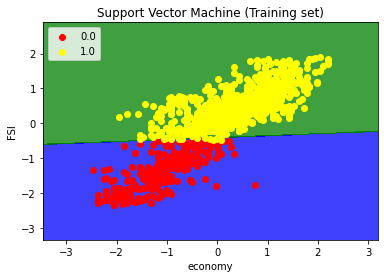

In [70]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('economy')
plt.ylabel('FSI')
plt.legend()
plt.legend()
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


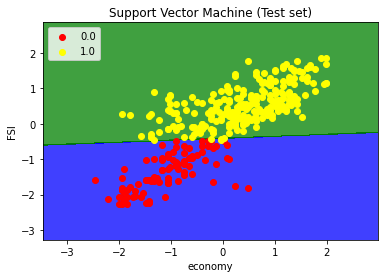

In [71]:

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('economy')
plt.ylabel('FSI')
plt.legend()
plt.show()